# Quantum Approximate Optimization algorithm

## Part 2

## Adiabatic computing introduction

## Variants of QAOA

A Review on quantum Approximate Optimization Algorithm and its Variants

---

Analytic 한 그래프틑 complete 랑 cylic, complete 는 mean-field 로 금방 풀림.

In [34]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

from dimod import BinaryQuadraticModel
from dimod import SPIN, BINARY

from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

In [6]:
def qubo_index(i, N, zero=True):
    max = N*(N-1)/2
    if i > max or i<1:
        return None
    
    for j in range(1, N+1):
        Nj = N-j
        if i > Nj:
            i -= Nj
        else:
            if zero:
                return (j+i-1, j-1)
            return (j+i, j)

In [82]:
# Graph define
pauli_string = [
    "ZZ", # XX, YY, ZI, IZ
    "XX", # YY
    "YY", #
    "ZI", # IZ
    "IZ"
]
b = np.ones(5)
adj_matrix = np.array([ # 0 commute, 1 anti-commute
    [0, 0, 0, 0, 0], #ZZ
    [0, 0, 0, 1, 1], # SX
    [0, 0, 0, 1, 1], # YY
    [0, 1, 1, 0, 0], # ZI
    [0, 1, 1, 0, 0] # IZ
])

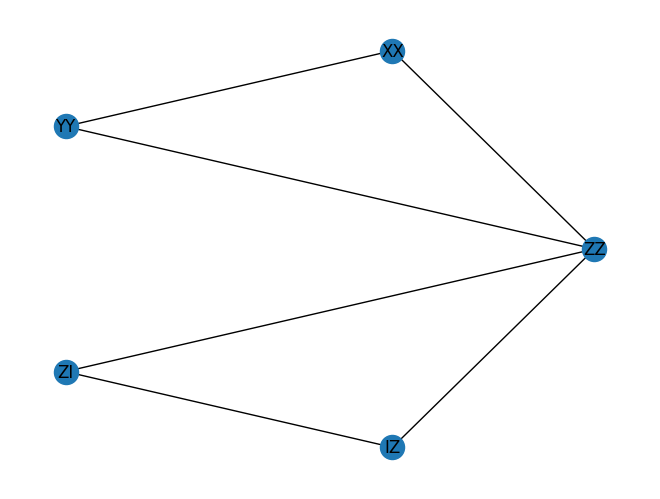

In [83]:
g = nx.Graph()
 
g.add_edge("ZZ", "XX")
g.add_edge("ZZ", "YY")
g.add_edge("ZZ", "ZI")
g.add_edge("ZZ", "IZ")

g.add_edge("XX", "YY")
g.add_edge("ZI", "IZ")
 
nx.draw_circular(g, with_labels = True)
plt.savefig("filename.png")

In [97]:
h = -1 #
mu = 2 # 

n0 = 5
q_r_diff = h*b
J_r_diff = 3* adj_matrix[np.triu_indices(n0, k = 1)]

linear_r = { (pauli_string[i], pauli_string[i]): q_r_diff[i] for i in range(0,n0)}
in_list_r= [   qubo_index(i, n0) for i in range(1, int(n0*(n0-1)/2)+1)]
in_list_r_char = [ (pauli_string[i], pauli_string[j]) for i, j in in_list_r]
quadratic_r = { in_list_r_char[i]: adj_matrix[*in_list_r[i]] for i in range(0, int(n0*(n0-1)/2))}


In [98]:
Quad001 = {**linear_r, **quadratic_r}

In [99]:
Quad001

{('ZZ', 'ZZ'): -1.0,
 ('XX', 'XX'): -1.0,
 ('YY', 'YY'): -1.0,
 ('ZI', 'ZI'): -1.0,
 ('IZ', 'IZ'): -1.0,
 ('XX', 'ZZ'): 0,
 ('YY', 'ZZ'): 0,
 ('ZI', 'ZZ'): 0,
 ('IZ', 'ZZ'): 0,
 ('YY', 'XX'): 0,
 ('ZI', 'XX'): 1,
 ('IZ', 'XX'): 1,
 ('ZI', 'YY'): 1,
 ('IZ', 'YY'): 1,
 ('IZ', 'ZI'): 0}

In [100]:
samples_sym_r = sampler.sample_qubo(Quad001, num_reads=1000, annealing_time= 1)


In [101]:
print(samples_sym_r)

   IZ XX YY ZI ZZ energy num_oc. chain_.
0   1  0  0  1  1   -3.0     501     0.0
1   0  1  1  0  1   -3.0     479     0.0
3   0  1  1  0  1   -3.0       1     0.2
2   1  1  0  1  1   -2.0       1     0.2
4   1  1  1  0  1   -2.0       1     0.0
5   0  0  1  1  1   -2.0       3     0.0
6   1  1  0  1  1   -2.0       1     0.0
7   1  0  1  0  1   -2.0       4     0.0
8   0  1  1  0  0   -2.0       1     0.0
9   0  1  1  1  1   -2.0       2     0.0
10  0  1  0  0  1   -2.0       2     0.0
11  1  0  1  1  1   -2.0       3     0.0
12  0  1  0  1  1   -2.0       1     0.0
['BINARY', 13 rows, 1000 samples, 5 variables]


In [89]:
samples_sym_r.record[0][0]

array([0, 1, 1, 0, 1], dtype=int8)

In [93]:
("XX", "YY", "ZZ"), ("IZ", "ZI")

(('XX', 'YY', 'ZZ'), ('IZ', 'ZI'))

In [102]:
adj_matrix2 = np.array([ # 0 commute, 1 anti-commute
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])

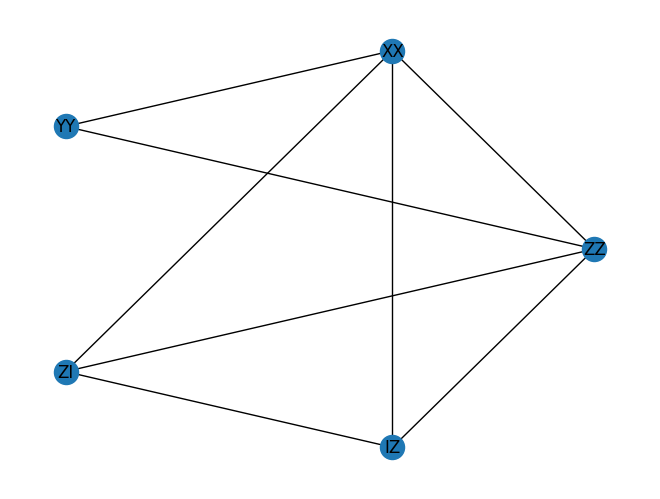

In [95]:
g = nx.Graph()
 
g.add_edge("ZZ", "XX")
g.add_edge("ZZ", "YY")
g.add_edge("ZZ", "ZI")
g.add_edge("ZZ", "IZ")

g.add_edge("XX", "YY")
g.add_edge("XX", "IZ")
g.add_edge("XX", "ZI")
g.add_edge("ZI", "IZ")
 
nx.draw_circular(g, with_labels = True)
plt.savefig("filename.png")

In [103]:
h = -0.8 # original 1
mu = 2 # 

n0 = 5
q_r_diff2 = h*b
J_r_diff2 = 3* adj_matrix2[np.triu_indices(n0, k = 1)]

linear_r2 = { (pauli_string[i], pauli_string[i]): q_r_diff[i] for i in range(0,n0)}
in_list_r2= [   qubo_index(i, n0) for i in range(1, int(n0*(n0-1)/2)+1)]
in_list_r_char2 = [ (pauli_string[i], pauli_string[j]) for i, j in in_list_r2]
quadratic_r2 = { in_list_r_char2[i]: adj_matrix2[*in_list_r2[i]] for i in range(0, int(n0*(n0-1)/2))}

In [104]:
Quad002 = {**linear_r2, **quadratic_r2}

In [105]:
samples_sym_r2 = sampler.sample_qubo(Quad002, num_reads=1000, annealing_time= 1)


In [106]:
print(samples_sym_r2)

  IZ XX YY ZI ZZ energy num_oc. chain_.
0  1  1  0  1  1   -4.0     985     0.0
1  1  1  1  1  1   -3.0       1     0.0
2  0  1  0  1  1   -3.0       3     0.0
3  0  1  1  1  1   -3.0       4     0.0
4  0  1  1  0  1   -3.0       4     0.0
5  1  1  0  0  1   -3.0       1     0.0
6  1  1  1  0  1   -3.0       1     0.0
7  0  1  1  1  1   -3.0       1     0.2
['BINARY', 8 rows, 1000 samples, 5 variables]


In [81]:
samples_sym_r2.record[0][0]

array([1, 1, 0, 1, 1], dtype=int8)

In [96]:
(("ZZ", "ZI", "XX", "IZ"), ("YY"))

(('ZZ', 'ZI', 'XX', 'IZ'), 'YY')